In [1]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

import os, sys

from collections import defaultdict

In [2]:
mx_base = "../"
outDirectory = mx_base + "/scai_eval/"

In [3]:
results_test_scilg_bionlp = pickle.load(open(outDirectory+"/results_test_scilg_bionlp.pickle", 'rb'))
results_train_scilg_bionlp = pickle.load(open(outDirectory+"/results_train_scilg_bionlp.pickle", 'rb'))

results_test_bionlp_bionlp = pickle.load(open(outDirectory+"/results_test_bionlp_bionlp.pickle", 'rb'))
results_train_bionlp_bionlp = pickle.load(open(outDirectory+"/results_train_bionlp_bionlp.pickle", 'rb'))

results_test_scilg_scilg = pickle.load(open(outDirectory+"/results_test_scilg_scilg.pickle", 'rb'))
results_train_scilg_scilg = pickle.load(open(outDirectory+"/results_train_scilg_scilg.pickle", 'rb'))

results_test_spcylg_bionlp = pickle.load(open(outDirectory+"/results_test_spcylg_bionlp.pickle", 'rb'))
results_train_spcylg_bionlp = pickle.load(open(outDirectory+"/results_train_spcylg_bionlp.pickle", 'rb'))

results_test_scilg_bionlp_subsetc = pickle.load(open(outDirectory+"/results_test_scilg_bionlp_subsetc.pickle", 'rb'))
results_train_scilg_bionlp_subsetc = pickle.load(open(outDirectory+"/results_train_scilg_bionlp_subsetc.pickle", 'rb'))

results_test_scilg_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_scilg_bionlp_subseti.pickle", 'rb'))
results_train_scilg_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_scilg_bionlp_subseti.pickle", 'rb'))

results_test_spcylg_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_spcylg_bionlp_subseti.pickle", 'rb'))
results_train_spcylg_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_spcylg_bionlp_subseti.pickle", 'rb'))

results_test_bionlp_bionlp_subseti = pickle.load(open(outDirectory+"/results_test_bionlp_bionlp_subseti.pickle", 'rb'))
results_train_bionlp_bionlp_subseti = pickle.load(open(outDirectory+"/results_train_bionlp_bionlp_subseti.pickle", 'rb'))

#precision 0.926829268292683
#recall 0.8571428571428571
#specificity 0.9090909090909091
#f1 0.890625

test2col = {
    "mx-plore/sci-lg (mod.)": "#6c05c4",
    "mx-plore/sci-lg": "#a669db",
    "mx-plore/BioNLP (mod.)": "#126199",
    "mx-plore/spacy-lg (mod.)": "#bd1273",
    #"miRExplore/atheMir": "#0e9090",
    "miRSel ‡": "#2397f5",
    "ProMiner/TriOcc †": "#fe6d13",
    "miRTex ‡": "#a7abf4",
    "RelEx": "#dbbd94"
}

all_runs = {
    (("ProMiner/TriOcc †",),): {'allruns': {"precision": 0.41, "recall": 0.45}},
    (("miRTex ‡",),): {'allruns': {"precision": 0.92, "recall": 0.82}},
    (("RelEx",),): {'allruns': {"precision": 0.79, "recall": 0.48}},
    (("miRSel ‡",),): {'allruns': {"precision": 0.55, "recall": 1.0}},
    #(("miRExplore/atheMir",),): {'allruns': {"precision": 0.72, "recall": 0.77}},
    (("mx-plore/sci-lg",),): {'allruns': {"precision": 0.94, "recall": 0.86}},

    (('mx-plore/sci-lg (mod.)',),): {'allruns': results_test_scilg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('mx-plore/BioNLP (mod.)',),): {'allruns': results_test_bionlp_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('mx-plore/spacy-lg (mod.)',),): {'allruns': results_test_spcylg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
}

In [4]:
all_runs

{(('ProMiner/TriOcc †',),): {'allruns': {'precision': 0.41, 'recall': 0.45}},
 (('miRTex ‡',),): {'allruns': {'precision': 0.92, 'recall': 0.82}},
 (('RelEx',),): {'allruns': {'precision': 0.79, 'recall': 0.48}},
 (('miRSel ‡',),): {'allruns': {'precision': 0.55, 'recall': 1.0}},
 (('mx-plore/sci-lg',),): {'allruns': {'precision': 0.94, 'recall': 0.86}},
 (('mx-plore/sci-lg (mod.)',),): {'allruns': {'precision': 0.9136690647482014,
   'recall': 0.9477611940298507,
   'specificity': 0.8775510204081632,
   'f1': 0.9304029304029303}},
 (('mx-plore/BioNLP (mod.)',),): {'allruns': {'precision': 0.8057553956834532,
   'recall': 0.835820895522388,
   'specificity': 0.7244897959183674,
   'f1': 0.8205128205128205}},
 (('mx-plore/spacy-lg (mod.)',),): {'allruns': {'precision': 0.7266187050359713,
   'recall': 0.8015873015873016,
   'specificity': 0.6415094339622641,
   'f1': 0.7622641509433962}}}

In [5]:
# -*- coding: utf-8 -*-
"""
Script to plot recall-precision values with f-measure equi-potential lines.

Created on Dec 16, 2009

@author: Jörn Hees
"""

import pylab as pl
import itertools as it
import numpy as np

def fmeasure(p, r):
    """Calculates the fmeasure for precision p and recall r."""
    return 2*p*r / (p+r)


def _fmeasureCurve(f, p):
    """For a given f1 value and precision get the recall value.

    The f1 measure is defined as: f(p,r) = 2*p*r / (p + r).

    If you want to plot "equipotential-lines" into a precision/recall diagramm
    (recall (y) over precision (x)), for a given fixed f value we get this
    function by solving for r:
    """
    return f * p / (2 * p - f)


def _plotFMeasures(fstepsize=.1, stepsize=0.001, xlim=None):
    """Plots 10 fmeasure Curves into the current canvas."""
    p = np.arange(0., 1., stepsize)[1:]
    for fi, f in enumerate(np.arange(0., 1., fstepsize)[1:]):
        points = [(x, _fmeasureCurve(f, x)) for x in p
                  if 0 < _fmeasureCurve(f, x) <= 1.5]
        xs, ys = zip(*points)
        curve, = pl.plot(xs, ys, "--", color="gray", linewidth=0.5)  # , label=r"$f=%.1f$"%f) # exclude labels, for legend
        # bad hack:
        # gets the 10th last datapoint, from that goes a bit to the left, and a bit down
        shiftf = ((1+fi) % 2) if fi < 8 else 0
        
        if not xlim is None:
            if ys[-10] < xlim[0]:
                continue
        plt.annotate(r"$F_1=%.1f$" % f, xy=(ys[-10], xs[-10]), xytext=(ys[-10]+ fi*0.002, xs[-10] - (shiftf*0.035)), size=12, color="gray")

# def _contourPlotFMeasure():
#    delta = 0.01
#    x = np.arange(0.,1.,delta)
#    y = np.arange(0.,1.,delta)
#    X,Y = np.meshgrid(x,y)
#    cs = pl.contour(X,Y,fmeasure,np.arange(0.1,1.0,0.1)) # FIXME: make an array out of fmeasure first
#    pl.clabel(cs, inline=1, fontsize=10)



# # if you don't believe the prime loop:
# icons = set()
# for i,j in it.izip(it.cycle(colors),it.cycle(markers)):
#    if (i,j) in icons: break
#    icons.add((i,j))
# print len(icons), len(colors)*len(markers)


def plotPrecisionRecallDiagram(title="title", points=None, labels=None, loc="center right",
                               sortedEntries=False, test2color=None, fontsizes={'ticks': 10,'title': 14, 'labels':12, 'legend': 12},
                               xlim=None, ylim=None):
    """Plot (precision,recall) values with 10 f-Measure equipotential lines.

    Plots into the current canvas.
    Points is a list of (precision,recall) pairs.
    Optionally you can also provide labels (list of strings), which will be
    used to create a legend, which is located at loc.
    """
    
    if fontsizes is None:
        fontsizes = {'ticks': 10,'title': 14, 'label':12, 'legend': 10, "dot": 50}
    
    if labels:
        ax = plt.axes([0.1, 0.1, 0.7, 0.8])  # llc_x, llc_y, width, height
    else:
        ax = plt.gca()
    plt.title(title)

    _plotFMeasures(xlim=xlim)
    
    if not xlim is None:
        ax.set_xlim(xlim)
    
    if not ylim is None:
        ax.set_ylim(ylim)
    
    ax.set_title(title, fontsize=fontsizes["title"])
    ax.set_xlabel('Precision', fontsize = fontsizes["label"])
    ax.set_ylabel('Recall', fontsize = fontsizes["label"])
    plt.xticks(fontsize=fontsizes["ticks"])
    plt.yticks(fontsize=fontsizes["ticks"])

    # _contourPlotFMeasure()
    
    colors = "bgrcmyk"  # 7 is a prime, so we'll loop over all combinations of colors and markers, when zipping their cycles
    markers = "so^>v<dph8"  # +x taken out, as no color.
    
    outputTableList = []

    if points:
        
        pointlabels = [x for x in zip(points, labels)]
        
        if sortedEntries:
            pointlabels = sorted(pointlabels, key=lambda x: x[1].upper())

        scps = []  # scatter points
        for i, ((x, y, f1), label) in enumerate(pointlabels):

            print(i, x, y, f1, label)
            outputTableList.append( (label, x, y, f1) )
            
            fcolor = test2color[label] if not test2color is None else colors[i % len(colors)]
            
            scp = ax.scatter(x, y, label=label, s=fontsizes["dot"], linewidths=0.75, facecolor=fcolor, alpha=0.75, marker=markers[i % len(markers)])
            scps.append(scp)
            # pl.plot(x,y, label=label, marker=getMarker(), markeredgewidth=0.75, markerfacecolor=getColor())
            # if labels: pl.text(x, y, label, fontsize="x-small")
            
        
            
        if labels:
            llabels = [x[1] for x in pointlabels]
            # pl.legend(scps, labels, loc=loc, scatterpoints=1, numpoints=1, fancybox=True) # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
            plt.legend(scps, llabels, loc=(1.01, 0), scatterpoints=1, numpoints=1, fancybox=True,fontsize=fontsizes["legend"])  # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
    
    
    
    offset = 0.02
    axis_lims = [0, 1, 0, 1]
    
    if not xlim is None:
        axis_lims[0] = xlim[0]
        axis_lims[1] = xlim[1]
    if not ylim is None:
        axis_lims[2] = ylim[0]
        axis_lims[3] = ylim[1]
    
    axis_lims = [axis_lims[0]-offset, axis_lims[1]+offset, axis_lims[2]-offset, axis_lims[3]+offset]    
    plt.axis(axis_lims)  # xmin, xmax, ymin, ymax
    

    

    

    
    outputTableList.insert(0, ("Rules enabled", "Precision", "Recall", "$F_1$"))
    
    #print("\\begin{table}")
    #print("\\begin{tabular}{@{}lrrr@{}}")
    
    #print("\\toprule")
    #print("&".join(["\\textbf{{{x}}}".format(x=x) for x in outputTableList[0]]) + "\\\\ \midrule")
    
    #for res in outputTableList[1:]:
    #    print("&".join([res[0]] + ["{0:0.3f}".format(x) for x in res[1:]]) + "\\\\")
    
    #print("\\end{tabular}")
    #print("\\end{table}")

def plot_results(inres, title, slot, test2color=None, figsize=(10,8), fontsizes=None, sortedEntries=False, outfolder=None, xlim=None, ylim=None):
    
    plt.figure(figsize=figsize)
    
    prList = []
    labels = []
    
    for x in inres:
        
        runres = inres[x][slot]
                                
        prec = runres["precision"]
        recall = runres["recall"]
        
        if "f1" in runres:
            f1 = runres["f1"]
        else:
            f1 = 2* prec * recall / (prec+recall)
        
        labels.append(";".join(x[0]))
        
        prList.append((prec, recall, f1))

    plotPrecisionRecallDiagram(title, prList, labels, test2color=test2color, fontsizes=fontsizes, sortedEntries=sortedEntries,
                               xlim=xlim, ylim=ylim)
        
    titlename = title.lower()
    
    for x in [",", "(", ")"]:
        titlename = titlename.replace(x, "")
        
    
    titlename = "_".join(titlename.split())
    
    if not outfolder is None:
        titlename = os.path.join(outfolder, titlename)
    
    plt.savefig(titlename + ".png", bbox_inches="tight")
    plt.savefig(titlename + ".pdf", bbox_inches="tight")
        
    plt.show()
    plt.close()
    
    

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.55 1.0 0.7096774193548387 miRSel ‡
1 0.92 0.82 0.8671264367816092 miRTex ‡
2 0.8057553956834532 0.835820895522388 0.8205128205128205 mx-plore/BioNLP (mod.)
3 0.94 0.86 0.8982222222222221 mx-plore/sci-lg
4 0.9136690647482014 0.9477611940298507 0.9304029304029303 mx-plore/sci-lg (mod.)
5 0.7266187050359713 0.8015873015873016 0.7622641509433962 mx-plore/spacy-lg (mod.)
6 0.41 0.45 0.4290697674418605 ProMiner/TriOcc †
7 0.79 0.48 0.5971653543307086 RelEx


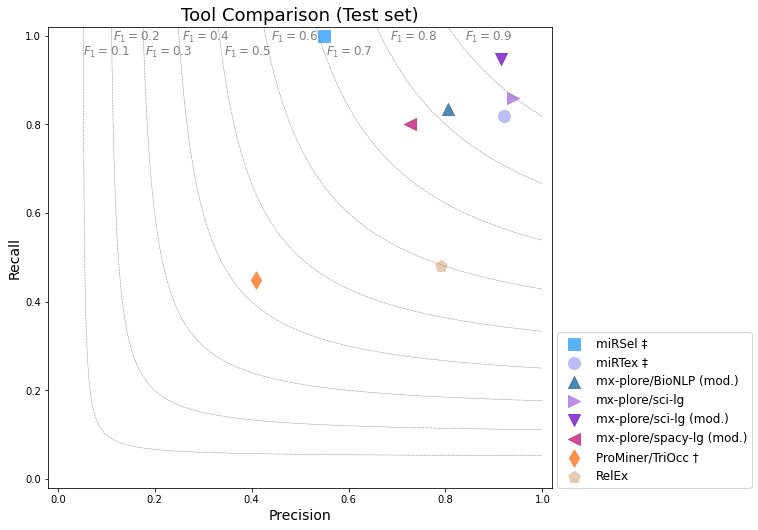

In [6]:
tools_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 12, "dot": 150}

plot_results(all_runs, "Tool Comparison (Test set)", "allruns", figsize=(10,8), sortedEntries=True, test2color = test2col, fontsizes=tools_fontsizes, outfolder=outDirectory)

In [7]:
rules_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 10, "dot": 75}

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9690721649484536 0.5295774647887324 0.6848816029143898 conj
2 1.0 0.5159574468085106 0.6807017543859649 sdp
3 0.9845360824742269 0.6303630363036303 0.7686116700201208 compartment
4 0.979381443298969 0.6312292358803987 0.7676767676767677 context
5 0.9896907216494846 0.48854961832061067 0.6541737649063033 entity
6 0.9690721649484536 0.5611940298507463 0.7107750472589791 conj;sdp
7 0.9587628865979382 0.6940298507462687 0.8051948051948052 conj;compartment
8 0.9484536082474226 0.6715328467153284 0.7863247863247863 conj;context
9 0.9587628865979382 0.5299145299145299 0.6825688073394495 conj;entity
10 0.9845360824742269 0.6678321678321678 0.7958333333333333 sdp;compartment
11 0.979381443298969 0.6506849315068494 0.7818930041152263 sdp;context
12 0.9896907216494846 0.5161290322580645 0.6784452296819787 sdp;entity
13 0.9639175257731959 0.7890295358649789 0.8677494199535962 compartment;context
14 0.9742268041237113 0.6321070234113713 0.7667342799

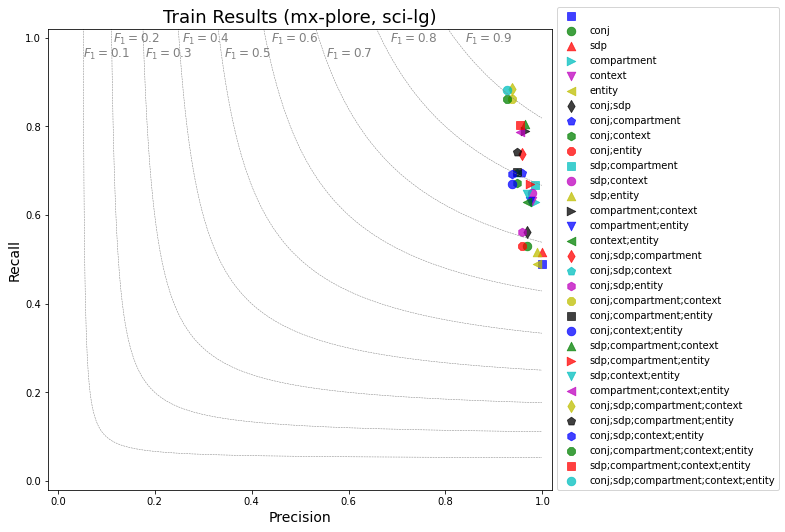

In [8]:
plot_results(results_train_scilg_bionlp_subseti, "Train Results (mx-plore, sci-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9424460431654677 0.6683673469387755 0.7820895522388059 conj
2 1.0 0.6096491228070176 0.7574931880108992 sdp
3 0.9856115107913669 0.7486338797814208 0.8509316770186336 compartment
4 0.9784172661870504 0.6570048309178744 0.786127167630058 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.9424460431654677 0.6822916666666666 0.7915407854984894 conj;sdp
7 0.935251798561151 0.8666666666666667 0.8996539792387542 conj;compartment
8 0.920863309352518 0.7231638418079096 0.810126582278481 conj;context
9 0.9424460431654677 0.6683673469387755 0.7820895522388059 conj;entity
10 0.9856115107913669 0.7569060773480663 0.8562500000000001 sdp;compartment
11 0.9784172661870504 0.6699507389162561 0.7953216374269007 sdp;context
12 0.9856115107913669 0.6061946902654868 0.7506849315068493 sdp;entity
13 0.9640287769784173 0.8220858895705522 0.8874172185430463 compartment;context
14 0.9712230215827338 0.7458563535911602 0.84375 compartm

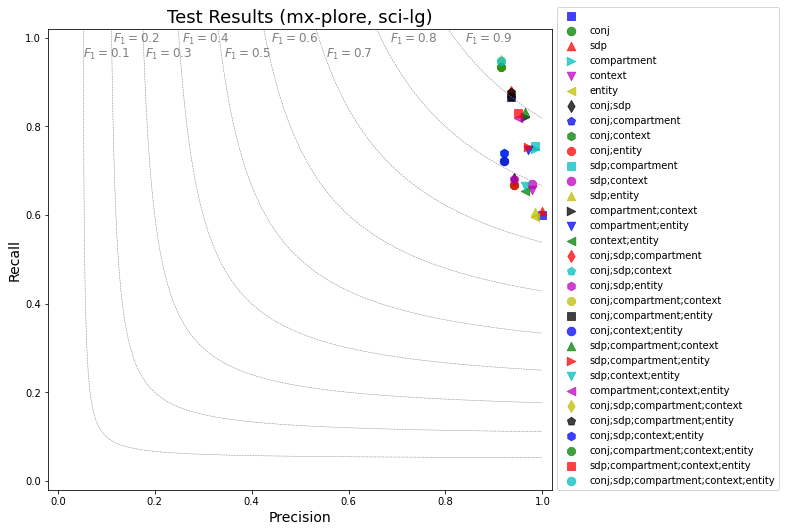

In [9]:
plot_results(results_test_scilg_bionlp_subseti, "Test Results (mx-plore, sci-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9424460431654677 0.6683673469387755 0.7820895522388059 conj
2 1.0 0.6096491228070176 0.7574931880108992 sdp
3 0.9856115107913669 0.7486338797814208 0.8509316770186336 compartment
4 0.9784172661870504 0.6570048309178744 0.786127167630058 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.9424460431654677 0.6822916666666666 0.7915407854984894 conj;sdp
7 0.935251798561151 0.8666666666666667 0.8996539792387542 conj;compartment
8 0.920863309352518 0.7231638418079096 0.810126582278481 conj;context
9 0.9424460431654677 0.6683673469387755 0.7820895522388059 conj;entity
10 0.9856115107913669 0.7569060773480663 0.8562500000000001 sdp;compartment
11 0.9784172661870504 0.6699507389162561 0.7953216374269007 sdp;context
12 0.9856115107913669 0.6061946902654868 0.7506849315068493 sdp;entity
13 0.9640287769784173 0.8220858895705522 0.8874172185430463 compartment;context
14 0.9712230215827338 0.7458563535911602 0.84375 compartm

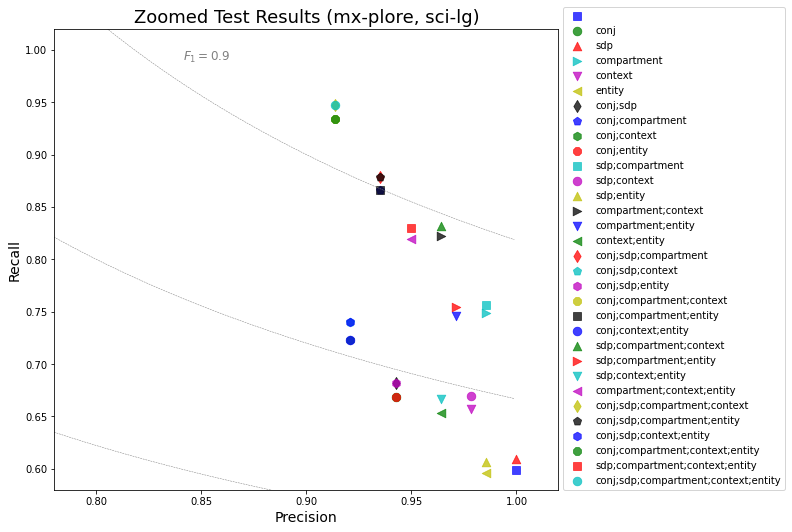

In [10]:
plot_results(results_test_scilg_bionlp_subseti,
             "Zoomed Test Results (mx-plore, sci-lg)", "interaction",
             xlim=(0.8, 1.0),
             ylim=(0.6, 1.0),
             fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9639175257731959 0.5067750677506775 0.6642984014209592 conj
2 0.9072164948453608 0.5028571428571429 0.6470588235294118 sdp
3 0.9072164948453608 0.5925925925925926 0.7169042769857433 compartment
4 0.979381443298969 0.6270627062706271 0.7645875251509054 context
5 0.9896907216494846 0.48854961832061067 0.6541737649063033 entity
6 0.8711340206185567 0.52 0.651252408477842 conj;sdp
7 0.8711340206185567 0.6282527881040892 0.7300215982721382 conj;compartment
8 0.9432989690721649 0.6332179930795848 0.7577639751552795 conj;context
9 0.9536082474226805 0.5068493150684932 0.6618962432915921 conj;entity
10 0.8402061855670103 0.6269230769230769 0.7180616740088105 sdp;compartment
11 0.8865979381443299 0.6539923954372624 0.7527352297592999 sdp;context
12 0.9020618556701031 0.5043227665706052 0.6469500924214417 sdp;entity
13 0.8865979381443299 0.7413793103448276 0.8075117370892019 compartment;context
14 0.9020618556701031 0.5952380952380952 0.717213114

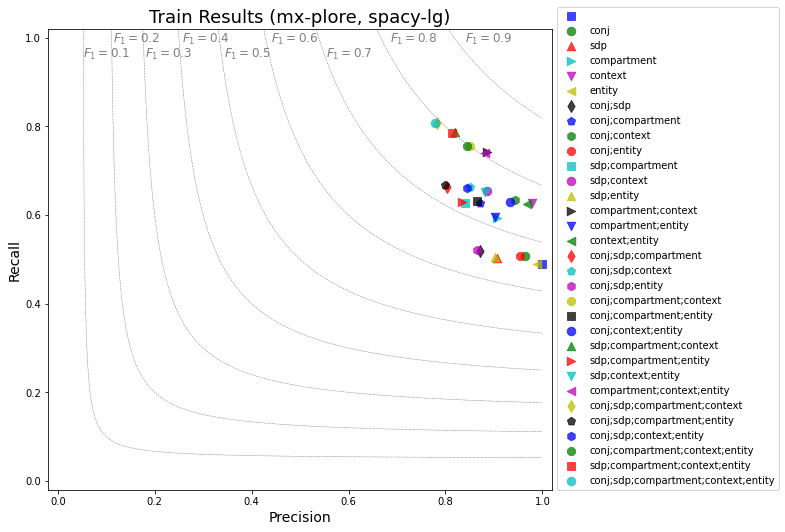

In [11]:
plot_results(results_train_spcylg_bionlp_subseti, "Train Results (mx-plore, spacy-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9856115107913669 0.6284403669724771 0.7675070028011205 conj
2 0.8992805755395683 0.5952380952380952 0.7163323782234957 sdp
3 0.841726618705036 0.6923076923076923 0.7597402597402597 compartment
4 0.9856115107913669 0.6462264150943396 0.7806267806267806 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.8848920863309353 0.6275510204081632 0.7343283582089551 conj;sdp
7 0.8273381294964028 0.7419354838709677 0.782312925170068 conj;compartment
8 0.9712230215827338 0.678391959798995 0.7988165680473372 conj;context
9 0.9712230215827338 0.625 0.7605633802816901 conj;entity
10 0.762589928057554 0.6794871794871795 0.7186440677966103 sdp;compartment
11 0.8848920863309353 0.643979057591623 0.7454545454545454 sdp;context
12 0.8848920863309353 0.5913461538461539 0.7089337175792507 sdp;entity
13 0.8345323741007195 0.7581699346405228 0.7945205479452054 compartment;context
14 0.8273381294964028 0.688622754491018 0.75163398692810

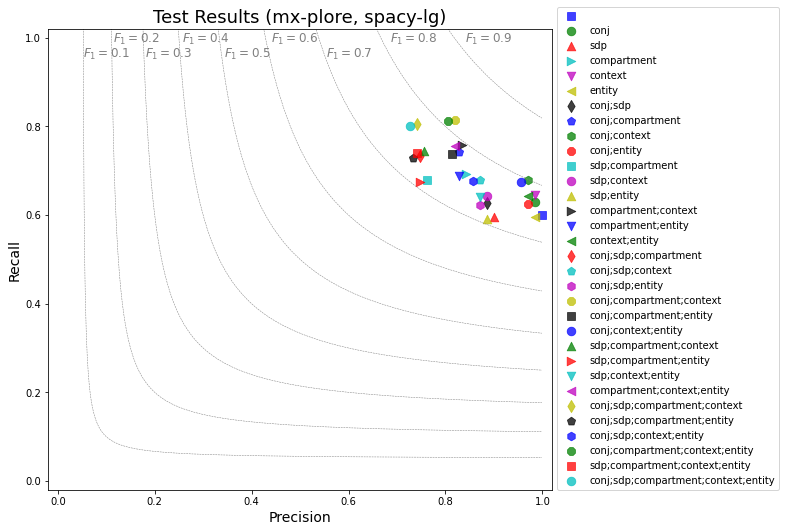

In [12]:
plot_results(results_test_spcylg_bionlp_subseti, "Test Results (mx-plore, spacy-lg)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9856115107913669 0.6284403669724771 0.7675070028011205 conj
2 0.8992805755395683 0.5952380952380952 0.7163323782234957 sdp
3 0.841726618705036 0.6923076923076923 0.7597402597402597 compartment
4 0.9856115107913669 0.6462264150943396 0.7806267806267806 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.8848920863309353 0.6275510204081632 0.7343283582089551 conj;sdp
7 0.8273381294964028 0.7419354838709677 0.782312925170068 conj;compartment
8 0.9712230215827338 0.678391959798995 0.7988165680473372 conj;context
9 0.9712230215827338 0.625 0.7605633802816901 conj;entity
10 0.762589928057554 0.6794871794871795 0.7186440677966103 sdp;compartment
11 0.8848920863309353 0.643979057591623 0.7454545454545454 sdp;context
12 0.8848920863309353 0.5913461538461539 0.7089337175792507 sdp;entity
13 0.8345323741007195 0.7581699346405228 0.7945205479452054 compartment;context
14 0.8273381294964028 0.688622754491018 0.75163398692810

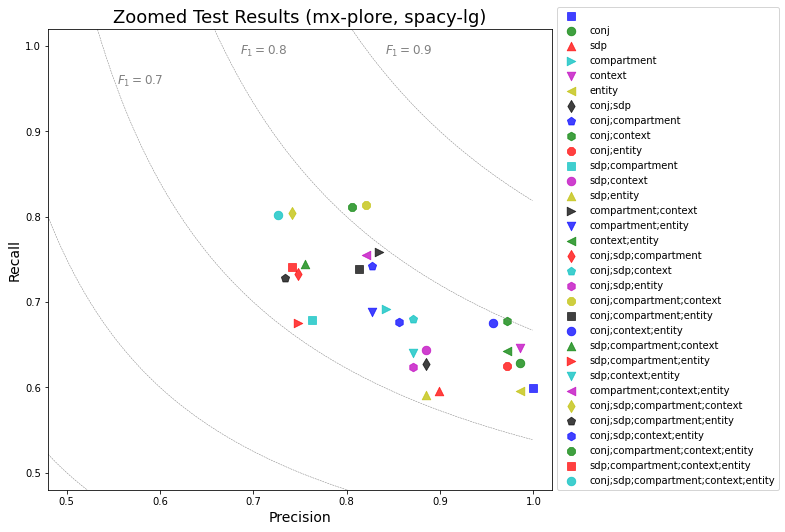

In [13]:
plot_results(results_test_spcylg_bionlp_subseti, "Zoomed Test Results (mx-plore, spacy-lg)", "interaction", xlim=(0.5, 1.0), ylim=(0.5, 1.0), fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.979381443298969 0.521978021978022 0.6810035842293907 conj
2 1.0 0.5159574468085106 0.6807017543859649 sdp
3 0.9278350515463918 0.5921052631578947 0.7228915662650602 compartment
4 0.979381443298969 0.6312292358803987 0.7676767676767677 context
5 0.9896907216494846 0.48854961832061067 0.6541737649063033 entity
6 0.979381443298969 0.5523255813953488 0.7063197026022305 conj;sdp
7 0.9072164948453608 0.6376811594202898 0.7489361702127658 conj;compartment
8 0.9587628865979382 0.6619217081850534 0.783157894736842 conj;context
9 0.9690721649484536 0.5222222222222223 0.6787003610108303 conj;entity
10 0.9278350515463918 0.6185567010309279 0.7422680412371134 sdp;compartment
11 0.979381443298969 0.6506849315068494 0.7818930041152263 sdp;context
12 0.9896907216494846 0.5161290322580645 0.6784452296819787 sdp;entity
13 0.9072164948453608 0.7457627118644068 0.8186046511627906 compartment;context
14 0.9226804123711341 0.5946843853820598 0.72323232323232

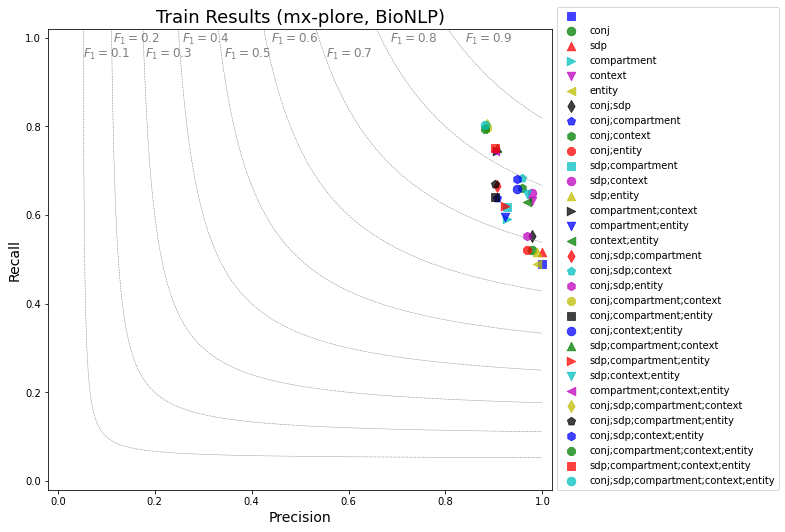

In [14]:
plot_results(results_train_bionlp_bionlp_subseti, "Train Results (mx-plore, BioNLP)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9136690647482014 0.6287128712871287 0.7448680351906158 conj
2 1.0 0.6123348017621145 0.7595628415300546 sdp
3 0.9064748201438849 0.711864406779661 0.7974683544303798 compartment
4 0.9784172661870504 0.6538461538461539 0.7838616714697407 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.9136690647482014 0.6446700507614214 0.7559523809523809 conj;sdp
7 0.8273381294964028 0.7718120805369127 0.7986111111111112 conj;compartment
8 0.8920863309352518 0.6775956284153005 0.7701863354037267 conj;context
9 0.9136690647482014 0.6287128712871287 0.7448680351906158 conj;entity
10 0.9064748201438849 0.72 0.802547770700637 sdp;compartment
11 0.9784172661870504 0.6666666666666666 0.7930029154518949 sdp;context
12 0.9856115107913669 0.6088888888888889 0.7527472527472527 sdp;entity
13 0.8848920863309353 0.7735849056603774 0.825503355704698 compartment;context
14 0.8920863309352518 0.7085714285714285 0.7898089171974523 compartmen

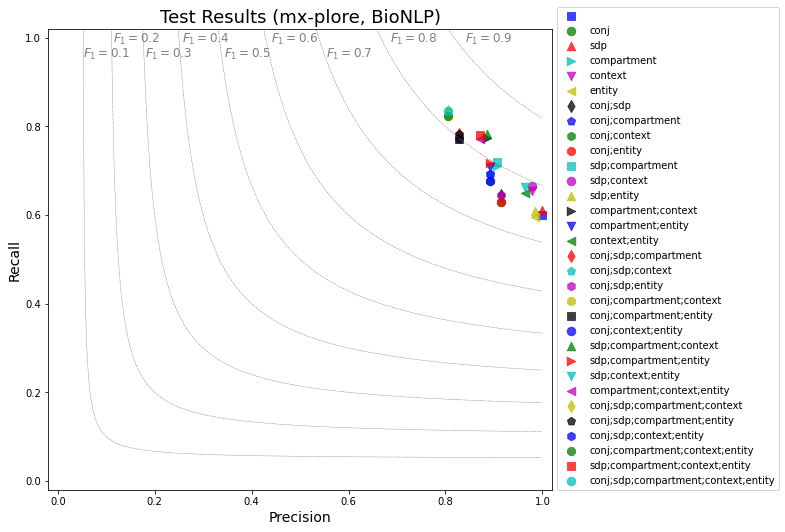

In [15]:
plot_results(results_test_bionlp_bionlp_subseti, "Test Results (mx-plore, BioNLP)", "interaction", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 1.0 0.5991379310344828 0.7493261455525607 
1 0.9136690647482014 0.6287128712871287 0.7448680351906158 conj
2 1.0 0.6123348017621145 0.7595628415300546 sdp
3 0.9064748201438849 0.711864406779661 0.7974683544303798 compartment
4 0.9784172661870504 0.6538461538461539 0.7838616714697407 context
5 0.9856115107913669 0.5956521739130435 0.7425474254742548 entity
6 0.9136690647482014 0.6446700507614214 0.7559523809523809 conj;sdp
7 0.8273381294964028 0.7718120805369127 0.7986111111111112 conj;compartment
8 0.8920863309352518 0.6775956284153005 0.7701863354037267 conj;context
9 0.9136690647482014 0.6287128712871287 0.7448680351906158 conj;entity
10 0.9064748201438849 0.72 0.802547770700637 sdp;compartment
11 0.9784172661870504 0.6666666666666666 0.7930029154518949 sdp;context
12 0.9856115107913669 0.6088888888888889 0.7527472527472527 sdp;entity
13 0.8848920863309353 0.7735849056603774 0.825503355704698 compartment;context
14 0.8920863309352518 0.7085714285714285 0.7898089171974523 compartmen

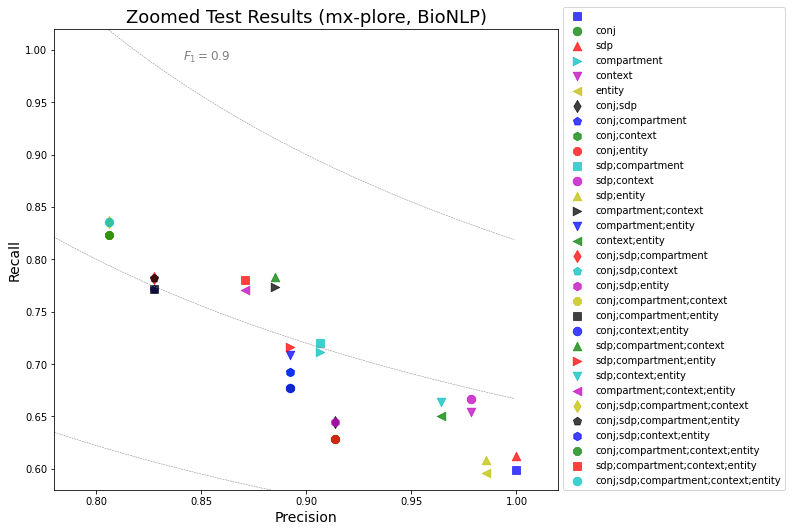

In [16]:
plot_results(results_test_bionlp_bionlp_subseti, "Zoomed Test Results (mx-plore, BioNLP)", "interaction", xlim=(0.8, 1.0), ylim=(0.6, 1.0), fontsizes=rules_fontsizes, outfolder=outDirectory)


In [17]:
def transformres(indata, slot):
    outdata = defaultdict(lambda: defaultdict(lambda: dict()))
    
    for x in indata:       
        outdata[tuple(reversed(x))][slot] = indata[x][slot]["weighted avg"]
        
    return outdata
        

#transformres(results_test_scilg_bionlp_subsetc, slot="regulation")

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.7309687134013719 0.460431654676259 0.5649841031542131 
1 0.7662549205918284 0.6258992805755396 0.6890018406491656 compartment
2 0.7129526630796202 0.5179856115107914 0.6000288215693459 between
3 0.83456562946869 0.7913669064748201 0.8123924035502468 counts
4 0.34617104571522717 0.5755395683453237 0.4323160245423898 return
5 0.7596716472975467 0.6546762589928058 0.7032767396249973 compartment;between
6 0.8842684661204039 0.841726618705036 0.8624732625936684 compartment;counts
7 0.6673475168121971 0.60431654676259 0.6342699434579386 compartment;return
8 0.8765448614927486 0.8489208633093526 0.862511737963553 between;counts
9 0.7550339157245632 0.6330935251798561 0.6887077789125382 between;return
10 0.8794073276678973 0.841726618705036 0.8601545021434848 counts;return
11 0.8820786563906394 0.8633093525179856 0.8725930851269005 compartment;between;counts
12 0.7550339157245632 0.6330935251798561 0.6887077789125382 compartment;between;return
13 0.9250454182108858 0.8920863309352518 0.908

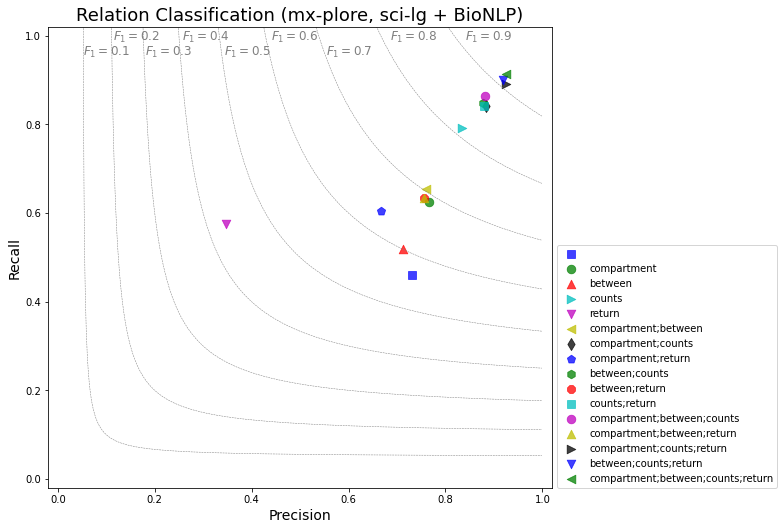

In [18]:
plot_results(transformres(results_test_scilg_bionlp_subsetc, slot="regulation"), "Relation Classification (mx-plore, sci-lg + BioNLP)", slot="regulation", fontsizes=rules_fontsizes, outfolder=outDirectory)

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/mirexplore/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


0 0.7309687134013719 0.460431654676259 0.5649841031542131 
1 0.7662549205918284 0.6258992805755396 0.6890018406491656 compartment
2 0.7129526630796202 0.5179856115107914 0.6000288215693459 between
3 0.83456562946869 0.7913669064748201 0.8123924035502468 counts
4 0.34617104571522717 0.5755395683453237 0.4323160245423898 return
5 0.7596716472975467 0.6546762589928058 0.7032767396249973 compartment;between
6 0.8842684661204039 0.841726618705036 0.8624732625936684 compartment;counts
7 0.6673475168121971 0.60431654676259 0.6342699434579386 compartment;return
8 0.8765448614927486 0.8489208633093526 0.862511737963553 between;counts
9 0.7550339157245632 0.6330935251798561 0.6887077789125382 between;return
10 0.8794073276678973 0.841726618705036 0.8601545021434848 counts;return
11 0.8820786563906394 0.8633093525179856 0.8725930851269005 compartment;between;counts
12 0.7550339157245632 0.6330935251798561 0.6887077789125382 compartment;between;return
13 0.9250454182108858 0.8920863309352518 0.908

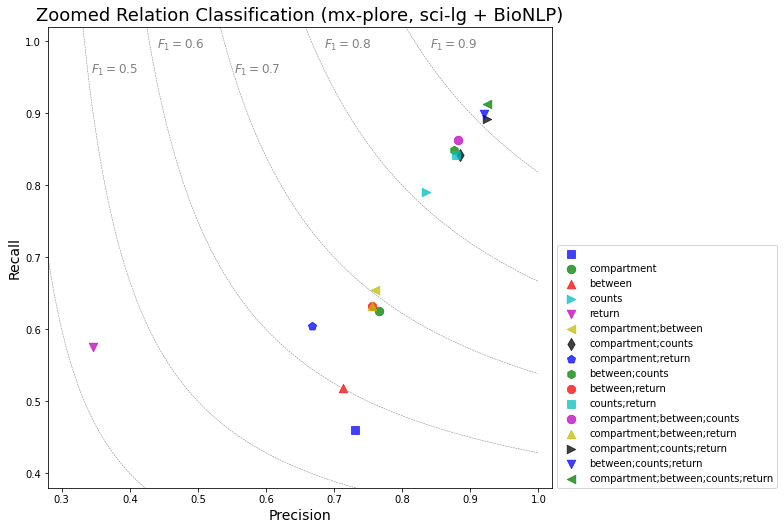

In [19]:
plot_results(transformres(results_test_scilg_bionlp_subsetc, slot="regulation"), "Zoomed Relation Classification (mx-plore, sci-lg + BioNLP)", xlim=(0.3, 1.0), ylim=(0.4, 1.0), slot="regulation", fontsizes=rules_fontsizes, outfolder=outDirectory)